In [2]:
import matplotlib.style
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.style.use('seaborn-v0_8-whitegrid')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
train.shape

(10886, 12)

In [6]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.info

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: >

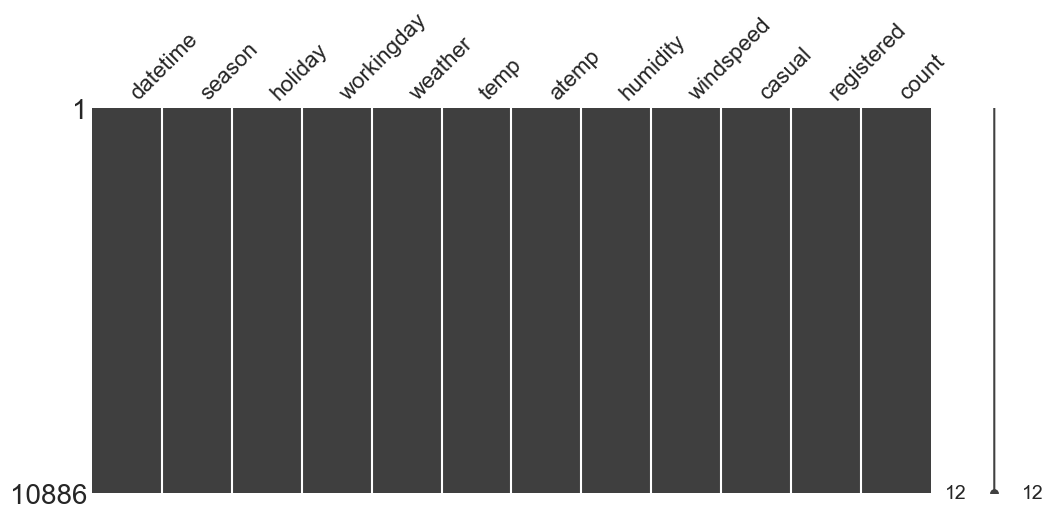

In [10]:
import missingno as msno

msno.matrix(train,figsize=(12,5))

In [11]:
train['datetime']=pd.to_datetime(train['datetime'])
# 문자형일 경우에 datetime으로 변환 후 전처리 진행

In [15]:
test['datetime']=pd.to_datetime(test['datetime'])

In [12]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape

# 컬럼 12개에서 -> 16개로 변경

(10886, 18)

In [13]:
combine = [train,test]


In [16]:
for dataset in combine :
    dataset['year']=dataset['datetime'].dt.year
    dataset['month']=dataset['datetime'].dt.month
    dataset['day']=dataset['datetime'].dt.day
    dataset['hour']=dataset['datetime'].dt.hour
    dataset['minute']=dataset['datetime'].dt.minute
    dataset['second']=dataset['datetime'].dt.second
    dataset['dayofweek']=dataset['datetime'].dt.dayofweek

In [20]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0


<Axes: xlabel='windspeed', ylabel='count'>

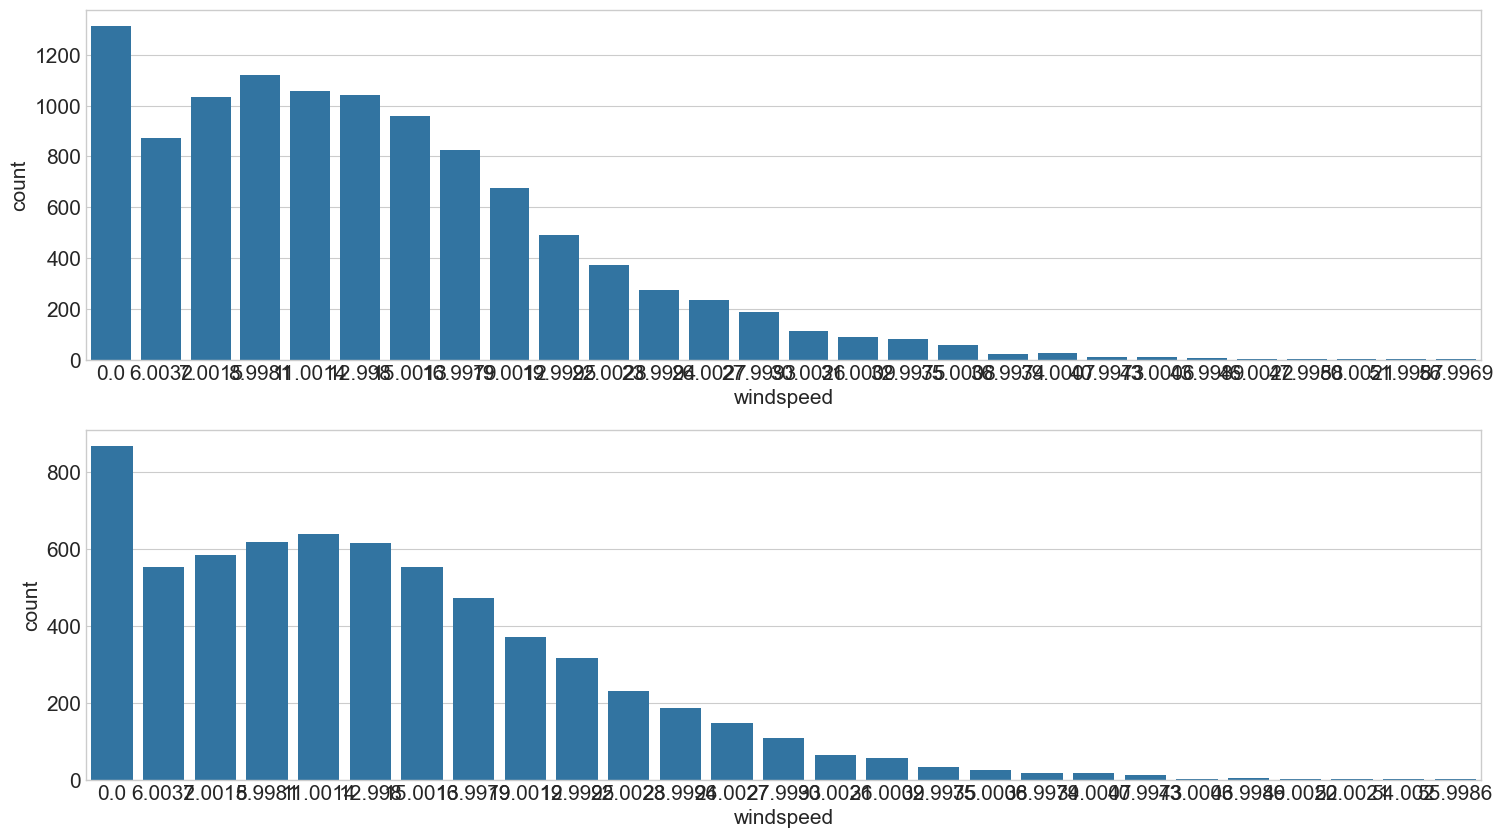

In [29]:
fig,ax = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

sns.countplot(x='windspeed',data=train,ax=ax[0])

sns.countplot(x='windspeed',data=test,ax=ax[1])


In [30]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek'],
      dtype='object')

In [31]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
def predice_widspeed(data) :

    # 풍속이 0인것과 아닌 것을 나누어 구분한다
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]

    # 풍속을 예측할 피처를 선택해준다.
    wCol = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp','humidity','year']
    
    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 변경해준다.
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype(str)

    # 랜덤포레스트 분류기르 한다

    model = RandomForestClassifier()

    # 모델을 학습한다.
    model.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])

    # 학습한 모델을 바탕으로 값 예측
    prdicted  = model.predict(X=dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해 
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predicteWin0 = dataWind0
    predicteWinNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    dataWind0['windspeed'] = prdicted

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터 프레임을 합쳐준다
    data = predicteWinNot0.append(predicteWin0)

    data['windspeed'] = data['windspeed'].astype(float)

    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)

    return data



In [34]:
train = predice_widspeed(train)

C:\Users\kjb00\AppData\Local\Temp\ipykernel_30776\2568171794.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype(str)
C:\Users\kjb00\AppData\Local\Temp\ipykernel_30776\2568171794.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWind0['windspeed'] = prdicted
C:\Users\kjb00\AppData\Local\Temp\ipykernel_30776\2568171794.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

<Axes: xlabel='windspeed', ylabel='count'>

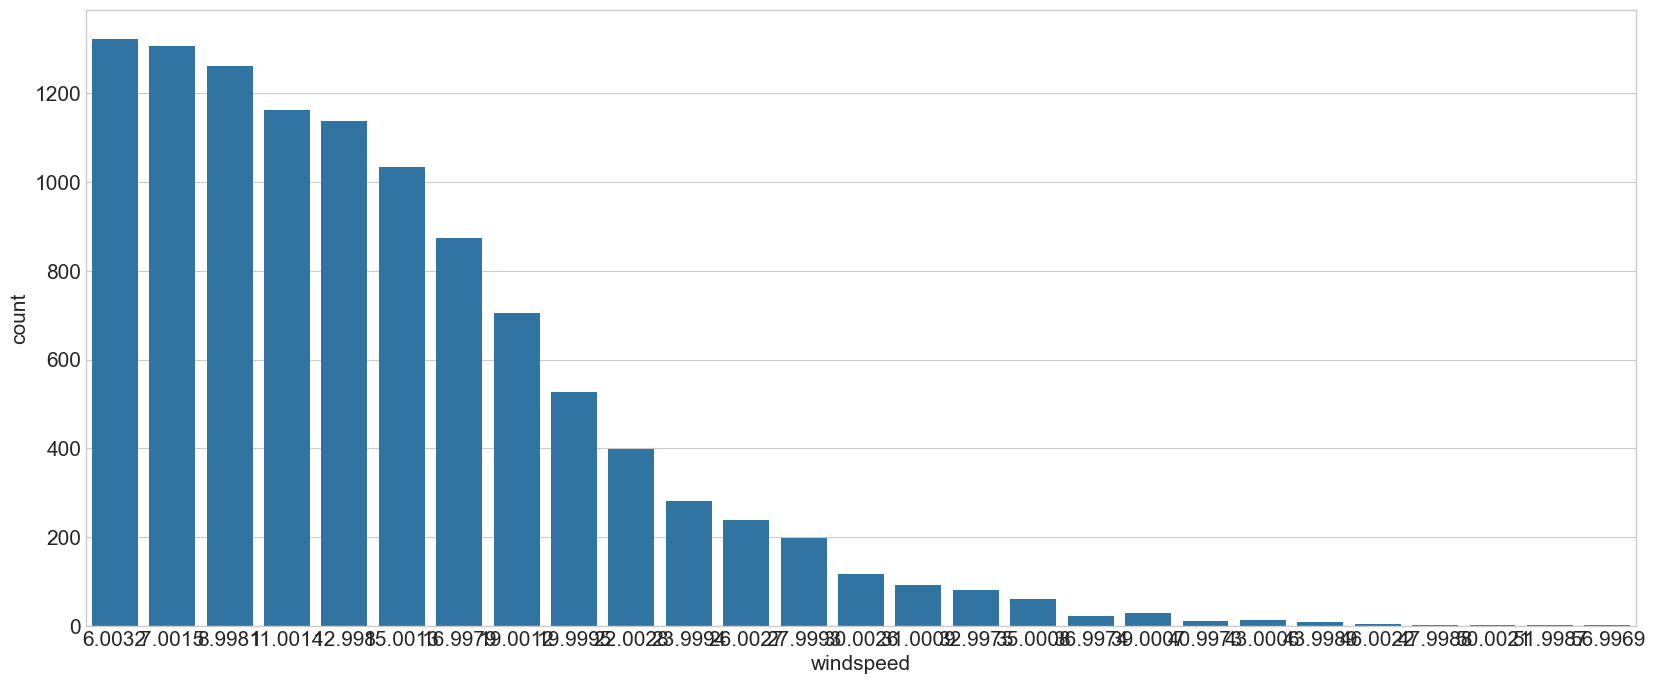

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(x='windspeed',data=train)
# 데이터가 0인 결측치 값을 랜덤포레스트로 대체하였다

In [42]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [41]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek'],
      dtype='object')

In [55]:
categori_feature_names = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'hour', 'dayofweek']

for var in categori_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')


In [49]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [56]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','year','hour','dayofweek','month']

In [52]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,month
0,1,0,0,2,9.84,12.880,75,6.0032,2011,5,5,1
1,1,0,0,1,15.58,19.695,76,16.9979,2011,10,5,1
2,1,0,0,1,14.76,16.665,81,19.0012,2011,11,5,1
3,1,0,0,1,17.22,21.210,77,19.0012,2011,12,5,1
4,1,0,0,2,18.86,22.725,72,19.9995,2011,13,5,1


In [57]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,month
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3,1


In [58]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [59]:
y_train = train['count']

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [66]:
from sklearn.metrics import make_scorer,mean_squared_log_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10,shuffle=True,random_state=0)

In [67]:
def rmsle(y_true,y_pred) :
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle, response_method='predict')

In [63]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list= []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=1,
                              random_state=0)
model

RandomForestRegressor(n_jobs=1, random_state=0)

In [69]:
score = cross_val_score(model,X_train,y_train,cv=kfold,scoring=make_scorer)
score = score.mean()

print('Score : {0:.5f}'.format(score))

C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\inspect.py", line 3259, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\inspect.py", line 3185, in _bind
    raise TypeError(
TypeError: too many positi

Score : nan


C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\inspect.py", line 3259, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\inspect.py", line 3185, in _bind
    raise TypeError(
TypeError: too many positi

In [70]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=1, random_state=0)

In [75]:
model.score(X_train,y_train)

0.9931613016602676

In [72]:
predicted = model.predict(X_test)

predicted.shape

(6493,)

C:\Users\kjb00\AppData\Local\Temp\ipykernel_30776\4001672529.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,ax=ax[0],bins=50)
C:\Users\kjb00\AppData\Local\Temp\ipykernel_30776\4001672529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predicted,ax=ax[1],bins=50)


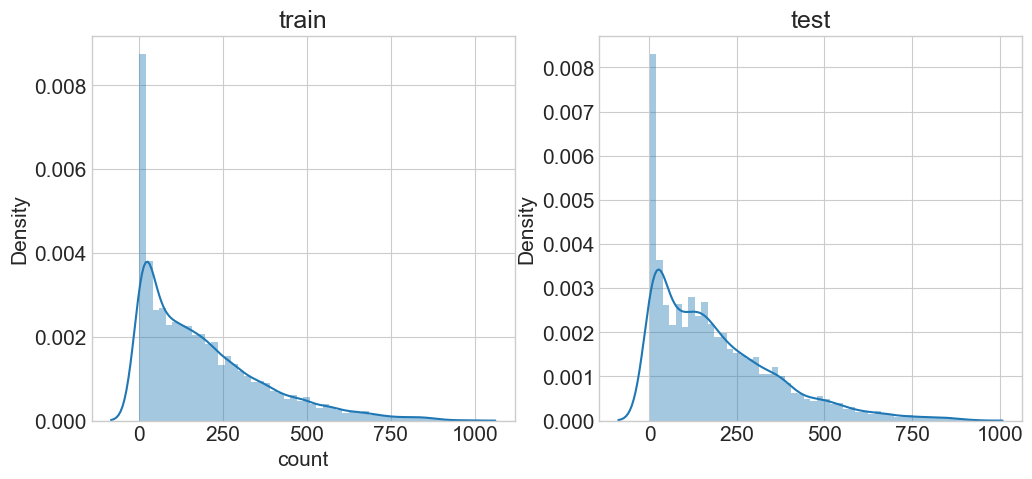

In [78]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax[0],bins=50)
ax[0].set_title('train')

sns.distplot(predicted,ax=ax[1],bins=50)
ax[1].set_title('test')

plt.show()

In [80]:
submission=pd.read_csv('sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [81]:
submission['count'] = predicted

In [82]:
submission

,datetime,count
0,2011-01-20 00:00:00,11.61
1,2011-01-20 01:00:00,5.41
2,2011-01-20 02:00:00,4.09
3,2011-01-20 03:00:00,3.34
4,2011-01-20 04:00:00,3.06
...,...,...
6488,2012-12-31 19:00:00,293.61
6489,2012-12-31 20:00:00,194.93
6490,2012-12-31 21:00:00,143.97
6491,2012-12-31 22:00:00,112.61


In [83]:
submission.to_csv('Bike_Sharing_Demand.csv',index=False)